<a href="https://colab.research.google.com/github/JeanFraga/DS-Unit-1-Sprint-1-Dealing-With-Data/blob/master/module3-databackedassertions/Jean_Fraga_LS_DS8_113_Making_Data_backed_Assertions_Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Lambda School Data Science - Making Data-backed Assertions

This is, for many, the main point of data science - to create and support reasoned arguments based on evidence. It's not a topic to master in a day, but it is worth some focused time thinking about and structuring your approach to it.

## Assignment - what's going on here?

Consider the data in `persons.csv` (already prepared for you, in the repo for the week). It has four columns - a unique id, followed by age (in years), weight (in lbs), and exercise time (in minutes/week) of 1200 (hypothetical) people.

Try to figure out which variables are possibly related to each other, and which may be confounding relationships.

Try and isolate the main relationships and then communicate them using crosstabs and graphs. Share any cool graphs that you make with the rest of the class in Slack!

In [0]:
# TODO - your code here
# Use what we did live in lecture as an example

# HINT - you can find the raw URL on GitHub and potentially use that
# to load the data with read_csv, or you can upload it yourself

In [0]:
import pandas as pd

In [39]:
people_url = 'https://github.com/JeanFraga/DS-Unit-1-Sprint-1-Dealing-With-Data/raw/master/module3-databackedassertions/persons.csv'
df_people = pd.read_csv(people_url)
#I dropped the first column to reduce redundancy
df_people = df_people.drop(df_people.columns[0], axis=1)
df_people.head()

print(df_people.shape)
print(df_people.head())

print('\n checking if null \n')
df_people.isnull().sum()

(1200, 3)
   age  weight  exercise_time
0   44     118            192
1   41     161             35
2   46     128            220
3   39     216             57
4   28     116            182

 checking if null 



age              0
weight           0
exercise_time    0
dtype: int64

In [0]:
#I'm going to use age and exercise time to predict weight
#I chose a bin that represents an age group that represents close to 10 years
#I chose a bin that represents an exercise time group that represents close to 75 minutes
#I chose a bin that represents a weight group that represents close to 75 pounds
bins_age = pd.cut(df_people['age'], 6)
#pd.crosstab(df_people['weight'], bins_age)
bins_exercise = pd.cut(df_people['exercise_time'], 4)
#pd.crosstab(df_people['weight'], bins_exercise)
bins_weight = pd.cut(df_people['weight'], 4)
#pd.crosstab(df_people['age'], bins_weight)

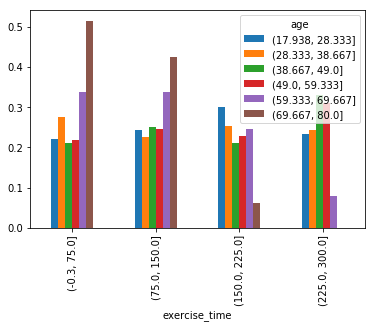

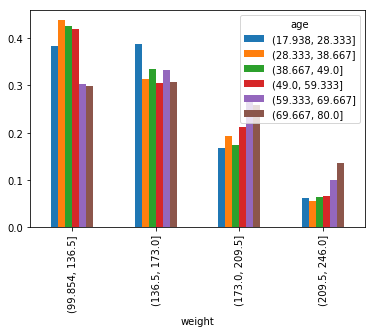

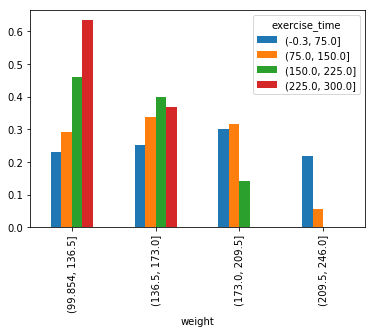

In [202]:
#Here I test to see if the bins I made work and also look at any relations the data might have
crosstab_age_exercise = pd.crosstab(bins_exercise,bins_age, normalize='columns')
#print(crosstab_age_exercise)

crosstab_age_weight = pd.crosstab(bins_weight,bins_age, normalize='columns')
crosstab_exercise_weight = pd.crosstab(bins_weight,bins_exercise, normalize='columns')

crosstab_age_exercise.plot(kind='bar');
crosstab_age_weight.plot(kind='bar');
crosstab_exercise_weight.plot(kind='bar');

#I can see that there is a negative relation between age and exercise time

In [198]:
#I wasn't making any sense of this data at this point so I decided to throw away this combination
pd.crosstab(bins_exercise, [bins_age, bins_weight], normalize='columns')

age            (17.938, 28.333]      ...       (69.667, 80.0]
weight          (99.854, 136.5]      ...       (209.5, 246.0]
exercise_time                        ...                     
(-0.3, 75.0]             0.1375      ...             0.814815
(75.0, 150.0]            0.1750      ...             0.185185
(150.0, 225.0]           0.2875      ...             0.000000
(225.0, 300.0]           0.4000      ...             0.000000

[4 rows x 24 columns]

In [199]:
#when I realized how I should organize the x and Y to make sense of the data I decided to try this

crosstab_people = pd.crosstab([bins_exercise, bins_age], bins_weight, normalize='columns')#.iloc[:,:]
crosstab_people

weight                           (99.854, 136.5]       ...        (209.5, 246.0]
exercise_time  age                                     ...                      
(-0.3, 75.0]   (17.938, 28.333]         0.024229       ...              0.114583
               (28.333, 38.667]         0.028634       ...              0.104167
               (38.667, 49.0]           0.013216       ...              0.125000
               (49.0, 59.333]           0.022026       ...              0.062500
               (59.333, 69.667]         0.028634       ...              0.166667
               (69.667, 80.0]           0.063877       ...              0.229167
(75.0, 150.0]  (17.938, 28.333]         0.030837       ...              0.020833
               (28.333, 38.667]         0.046256       ...              0.020833
               (38.667, 49.0]           0.033040       ...              0.010417
               (49.0, 59.333]           0.022026       ...              0.062500
               (59.333, 69.667]         0.037445       ...              0.031250
               (69.667, 80.0]           0.050661       ...              0.052083
(150.0, 225.0] (17.938, 28.333]         0.050661       ...              0.000000
               (28.333, 38.667]         0.063877       ...              0.000000
               (38.667, 49.0]           0.044053       ...              0.000000
               (49.0, 59.333]           0.044053       ...              0.000000
               (59.333, 69.667]         0.046256       ...              0.000000
               (69.667, 80.0]           0.015419       ...              0.000000
(225.0, 300.0] (17.938, 28.333]         0.070485       ...              0.000000
               (28.333, 38.667]         0.070485       ...              0.000000
               (38.667, 49.0]           0.096916       ...              0.000000
               (49.0, 59.333]           0.081498       ...              0.000000
               (59.333, 69.667]         0.015419       ...              0.000000

[23 rows x 4 columns]

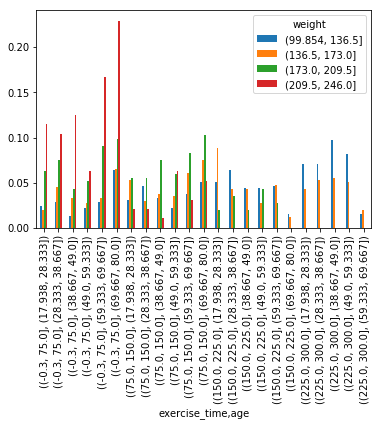

In [200]:
#this graph doesn't paint an easily representable conclusion at first glance 
#but I can see that the red and green shrink as I go further in the exercise time and age
crosstab_people.plot(kind='bar');

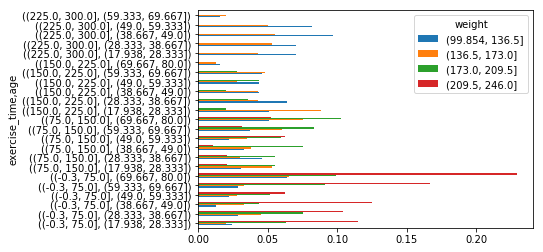

In [193]:
#this graph painted the same conclusion as before but in a different orientation.
#I did not find a use for it in the way I organized the data
crosstab_people.plot(kind='barh');

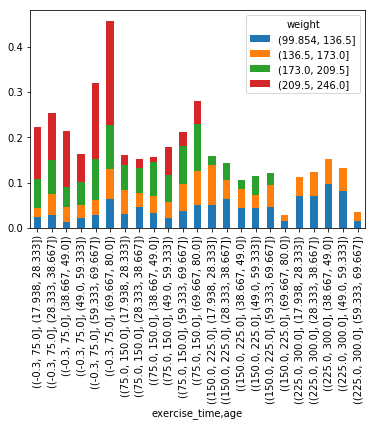

In [201]:
#This graph represented a more agreeable way of absorbing the relationship between the variables I chose
#red and green shrank as exercise time and age increase meaning people where heavier the less they exercised.
#also people exercised less as they got older so some age groups shrink as they go along

crosstab_people.plot(kind='bar', stacked=True);

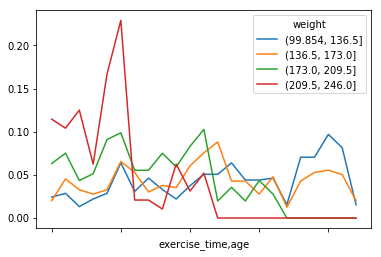

In [195]:
crosstab_people.plot();

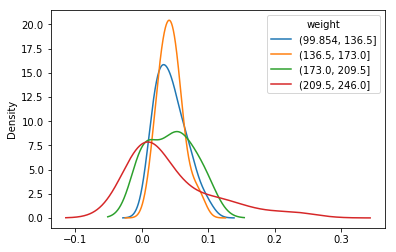

In [196]:
crosstab_people.plot.density();

### Assignment questions

After you've worked on some code, answer the following questions in this text block:

1.  What are the variable types in the data?

weight, age, exercise time

2.  What are the relationships between the variables?

There were a couple I noticed, first I noticed a negative relationship between age and exercise time. further compounding the three variables I was able to see a relationship with graphs between exercise time and age to weight. I found the stacked bar graph and regular bar graph to be the ones that provided the most information to my initial hypothesis. That weight is lower in relation to a higher age/exercise time

3.  Which relationships are "real", and which spurious?

exercise time and weight have a strong correlation here. Exercise time and age are spurious since there can be another role that stops older people from exercising.



## Stretch goals and resources

Following are *optional* things for you to take a look at. Focus on the above assignment first, and make sure to commit and push your changes to GitHub.

- [Spurious Correlations](http://tylervigen.com/spurious-correlations)
- [NIH on controlling for confounding variables](https://www.ncbi.nlm.nih.gov/pmc/articles/PMC4017459/)

Stretch goals:

- Produce your own plot inspired by the Spurious Correlation visualizations (and consider writing a blog post about it - both the content and how you made it)
- Pick one of the techniques that NIH highlights for confounding variables - we'll be going into many of them later, but see if you can find which Python modules may help (hint - check scikit-learn)